### ANDRI NUR LESMANA
### 2109106101

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential,layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
df = pd.read_csv('Restaurant reviews.csv')
pd.set_option('display.max_columns', None)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


### Drop semua kolom yang bukan numerik
Kemudian drop kolom yang dianggap tidak memengaruhi prediksi

In [32]:
le = LabelEncoder()
df['Pictures'] = le.fit_transform(df['Pictures']).astype('float64')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pictures  10000 non-null  float64
 1   7514      10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


,Pictures,7514
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [33]:
df = df.select_dtypes(include=['number'])
df.drop(df.columns[4:], axis=1, inplace=True)
df.isna().sum()

Pictures    0
7514        0
dtype: int64

### Split dataset menjadi data train dan data test
Kasus yang dipilih adalah memprediksi nilai dari New Deaths berdasarkan New Cases, New Recovered, dan Active Case Fitur = New Cases, New Recovered, dan Active Cas s TargetEffectiveths

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pictures  10000 non-null  float64
 1   7514      10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(['Pictures'], axis=1)
y = df['Pictures']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membuat model dengan 5 layer¶
Menggunakan activation relu dengan 3 inpu Menggunakan 1 output layer karena target hanya 1 dan menggunakan default activation yaitu linear

In [67]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
    
    tf.keras.layers.Dense(1, activation = 'sigmoid')# Output layer untuk regresi dengan 1 neuron (linear)
])

In [68]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback

# def r2_score(y_true, y_pred):
#     SS_res =  K.sum(K.square(y_true - y_pred)) 
#     SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
#     return (1 - SS_res/(SS_tot + K.epsilon()))

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.85:
            print("\nAkurasi telah mencapai 80%, proses pelatihan dihentikan.")
            self.model.stop_training = True
     

custom_callback = CustomCallback()

### Compile model dengan optimizer Adam dan loss huber karena huber dapat mengabaikan data outlier, serta menggunakan metrics r2_score yang telah dibuat di atas

In [69]:
model.compile(optimizer='Adam', loss='huber', metrics=["accuracy"])

### Membuat callback untuk memonitoring val_loss
Menggunakan library ModelCheckpoint untuk menyimpan hasil terbaik selama pelatihan### Misalkan val_loss tidak menurun atau tidak membaik

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model checkpoint untuk menyimpan model terbaik selama pelatihan (dengan val_loss terendah)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

### Train data dengan jumlah epochs 500 dan juga menggunakan callback yang telah dibuat di atas

In [71]:
data_train = model.fit(X_train,y_train, epochs = 500 ,validation_data = (X_test, y_test) )

Epoch 1/500


ValueError: in user code:

    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_27" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (32, 1)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 1), dtype=float64)
      • training=True
      • mask=None


In [72]:
y_pred = model.predict(X_test)
y_pred

ValueError: in user code:

    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_27" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float64)
      • training=False
      • mask=None


In [73]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

NameError: name 'y_pred' is not defined

In [74]:
eval_result = model.evaluate(X_test, y_test)

ValueError: in user code:

    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Asus\venv_c1-c2\hudzai_089\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_27" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float64)
      • training=False
      • mask=None


NameError: name 'trained_data' is not defined

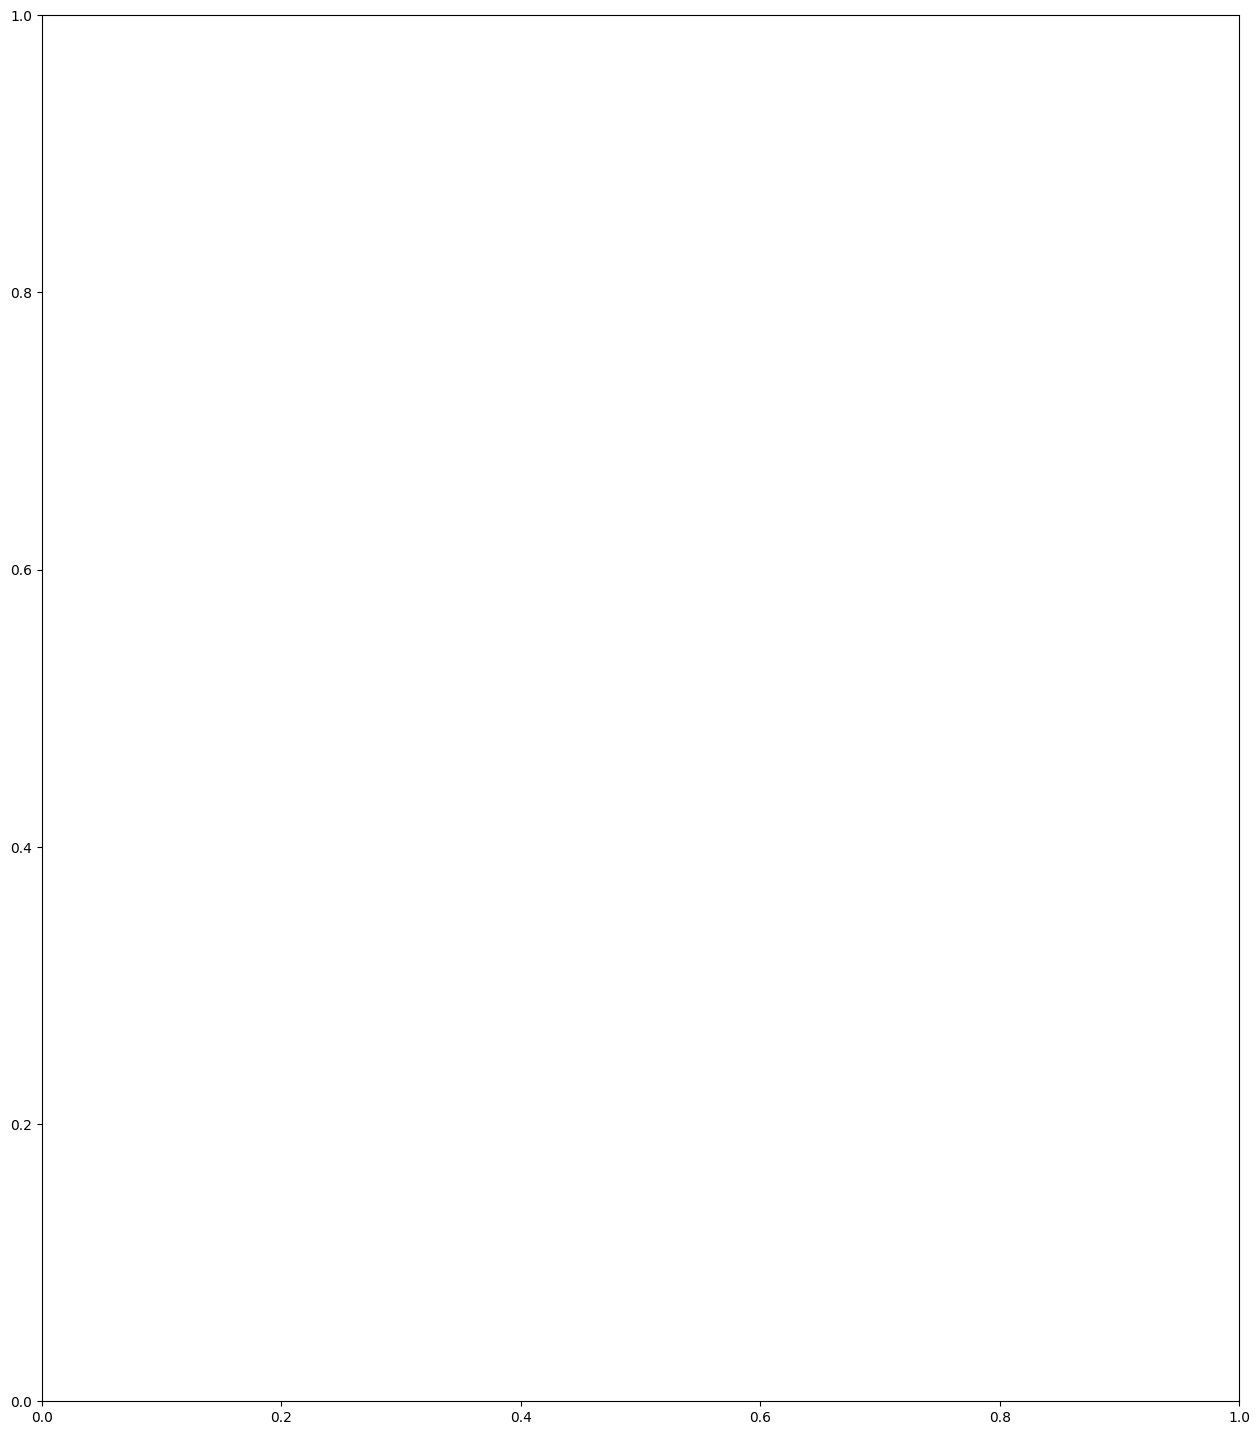

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(34, 18))
plt.subplot(1, 2, 1)
plt.plot(trained_data.history['val_r2_score'], label='Validation R2 Score')
plt.plot(trained_data.history['r2_score'], label='Train R2 Score')
plt.title('R2 Score vs. Epochs')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Buat grafik Loss
plt.figure(figsize=(34, 18))
plt.subplot(1, 2, 2)
plt.plot(trained_data.history['val_loss'], label='Validation Loss')
plt.plot(trained_data.history['loss'], label='Train Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()